Find a data prediction report on Kaggle.com, Towardsdatascience.com/, or another website. Include the link to the article. List out at least three new techniques/concepts you learned from this article which were not covered in this course. For each technique, describe when it shall be used, the advantage of using it, etc. 

I will be using this report https://www.kaggle.com/code/caesarmario/loan-prediction-w-various-ml-models/notebook so that I can expand on my project 2 work. This report uses a variety of ML models that we didnt cover in class. The three I'll address are random forest, decision tree, and Support vector machine. The report itself doesnt go into the details of the techniques so I will use and provide additional sources to answer the questions.

Support Vector Machine - A type of supervised learning SVM can be used for regression, classification, and outlier detection. SVM are in a way similar to k nearest neighbor as its concerned with distances between points but SVM chooses the best line to classfiy your data points for you. Specifically, linear SVM chooses the line that separates the data and is the furthest away from the closet data points as possible. Non-linear SVM creates more complex boundaries that are not simply straight lines which means you can capture more complex relationships between your data without having to do complicated transformations manually. SVM does transformations for you but is also complicated and difficult to interpret. You should use SVM when the data set has multiple features, when there are more features than data points, when the relationship between features is complex, and when you dont necessarily need more than the result as the SVM process can be difficult to interpret.

Sources for SVM - (https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47, https://www.freecodecamp.org/news/svm-machine-learning-tutorial-what-is-the-support-vector-machine-algorithm-explained-with-code-examples/#:~:text=SVMs%20are%20used%20in%20applications,linear%20and%20non%2Dlinear%20data, https://www.kdnuggets.com/2017/02/yhat-support-vector-machine.html)

Decision Tree - Supervised learning technique that starts at a node and splits or branches in two or more directions based on certain conditions. Decision trees are used in prediction analysis, data classification, and regression. Decision trees break down complex data into manageable parts using the node structure. Decision trees are easily interpretted visually, requires minimal data cleaning/preparation before use, and can easily be combined with other decision-making techniques. Decision trees are especially useful for classification problems.

Sources for Decision tree - (https://www.seldon.io/decision-trees-in-machine-learning#:~:text=The%20majority%20of%20decision%20trees,continuous%20outcomes%20from%20unseen%20data, https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052, https://www.xoriant.com/blog/decision-trees-for-classification-a-machine-learning-algorithm)

Random Forest - Another supervised learning technique, random forest creates and combines multiple decision trees. Random forest can be used for both regression and classification problems. The idea behind random forest is that a group will perform classification or regression more accurately than a single tree by reducing the chance for error by averaging the result of the ensemble of trees. Random forest is not simple singular decision trees average together, the trees that make up the forest need to have low or no correlation with one another an random forest will, as the name suggests, randomly determine what data to use in each tree. Random forest is versatile, accurate, often used in predictive analysis, easy to understand, and algorithm doesnt require alot of tinkering to be accurate. Random forest can be used in most regression and classficiation problems easily and allows for creating an accurate model quickly. 

Sources for Random Forest - (https://careerfoundry.com/en/blog/data-analytics/what-is-random-forest/#:~:text=Random%20Forest%20is%20a%20supervised,spam%E2%80%9D%20or%20%E2%80%9Cnot%20spam%E2%80%9D, https://builtin.com/data-science/random-forest-algorithm#difference, https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

List out at least three ways how this data report can be improved.

1. The report does alot of technical work without providing rationale for choices. I think the report could benefit from some exposition on the reasoning behind specific choices. For example, looking at the preprocessing section of the report theres little to no explanation for the choices made. The author has a section called one-hot encoding and states "transform categorical variables into a form that could be provided by ML algorithms to do a better prediction." but offers no explanation as to why this form is better. There are numerous examples of this sort of lack of explanation throughout the report. 

2. The author spends no time discussing the results of the prediction models. There is no conclusion or discussion of the results. 

3. The author evaluates the model with resampled data via SMOTE this leads to bias in the models. The author should be using the original data to evaluate the models.

Build your own prediction model with the data cleaning pipeline and algorithms we have learned. Garbage in, garbage out. Also make sure you take all the necessary steps of data cleaning and feature engineering before you apply the prediction algorithm. 

In [48]:
'''
Data Cleaning
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

data = pd.read_csv("loan-train.csv")
display(data)
print("shape", data.shape)
print("")
print("Column Headers\n", data.columns.tolist())
print("")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


shape (614, 13)

Column Headers
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']



In [49]:
print("Data Types")
print(data.dtypes)
print("")

print("Values missing in each feature: ")
print(data.isnull().sum())

Data Types
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Values missing in each feature: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [50]:
'''
fill missing values in self_employed with No
'''
data['Self_Employed'] = data['Self_Employed'].fillna('No')
print("Fill Null in Self_employed")
print("Values missing in each feature: ")
print(data.isnull().sum())

Fill Null in Self_employed
Values missing in each feature: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [51]:

remove = ['Loan_ID']
data.drop(remove, inplace=True, axis=1)
print("")

print("Drop Loan_ID")
print("shape", data.shape)


Drop Loan_ID
shape (614, 12)


In [52]:
data = data.dropna()
print("")
print("Dropped Nulls")
print("shape", data.shape)



Dropped Nulls
shape (505, 12)


In [53]:
print("Change loan_status to 1 for y and 0 for N")
data['Loan_Status'].replace(['Y', 'N'], [1, 0], inplace=True)
data.head(10)

Change loan_status to 1 for y and 0 for N


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0
10,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,1


In [54]:
'''
Display current data
Use value_counts() to see the range of values in each column.
Check if the target is balanced.
'''
print('')
print(data.Gender.value_counts(dropna=False))
print('')
print(data.Married.value_counts(dropna=False))
print('')
print(data.Dependents.value_counts(dropna=False))
print('')
print(data.Education.value_counts(dropna=False))
print('')
print(data.Self_Employed.value_counts(dropna=False))
print('')
print(data.ApplicantIncome.value_counts(dropna=False))
print('')
print(data.CoapplicantIncome.value_counts(dropna=False))
print('')
print(data.LoanAmount.value_counts(dropna=False))
print('')
print(data.Loan_Amount_Term.value_counts(dropna=False))
print('')
print(data.Credit_History.value_counts(dropna=False))
print('')
print(data.Property_Area.value_counts(dropna=False))
print('')
print(data.Loan_Status.value_counts(dropna=False))



Male      412
Female     93
Name: Gender, dtype: int64

Yes    324
No     181
Name: Married, dtype: int64

0     289
2      90
1      84
3+     42
Name: Dependents, dtype: int64

Graduate        402
Not Graduate    103
Name: Education, dtype: int64

No     439
Yes     66
Name: Self_Employed, dtype: int64

2500    8
4583    6
3750    5
2600    5
5000    5
       ..
7787    1
3430    1
3975    1
3244    1
7583    1
Name: ApplicantIncome, Length: 421, dtype: int64

0.0       226
2083.0      5
2500.0      5
1666.0      5
1459.0      3
         ... 
3021.0      1
983.0       1
1775.0      1
2791.0      1
240.0       1
Name: CoapplicantIncome, Length: 240, dtype: int64

120.0    16
110.0    15
100.0    13
187.0    12
128.0    10
         ..
42.0      1
72.0      1
240.0     1
214.0     1
253.0     1
Name: LoanAmount, Length: 190, dtype: int64

360.0    433
180.0     39
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: i

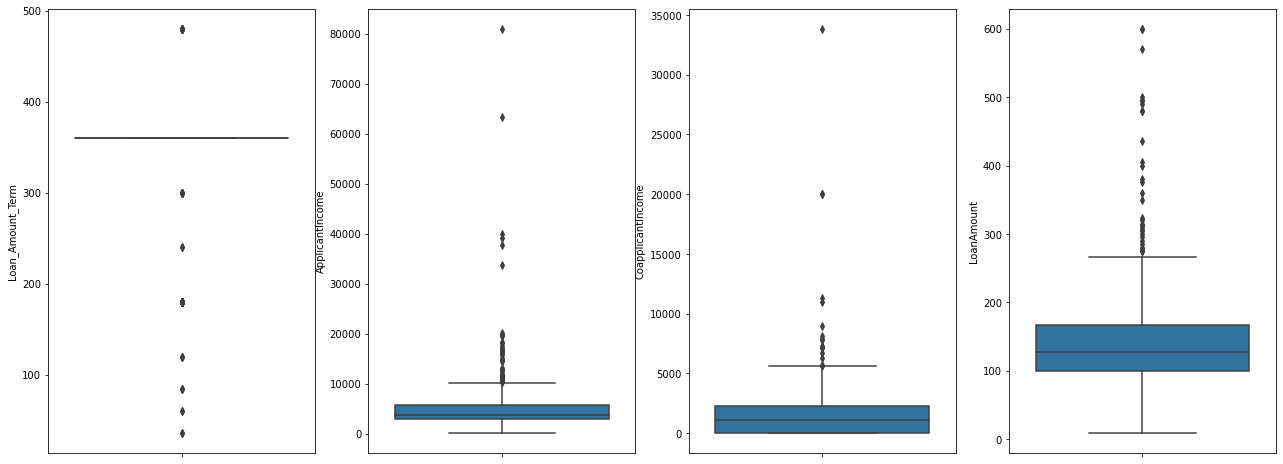

In [55]:
'''
Generate boxplots for all the numerical features
'''
num_list=['Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig=plt.figure(figsize=(22, 18))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=column, data=data)
    

In [56]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
x = data.loc[:, ['Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
y = data.loc[:, 'Loan_Status']

fs = SelectKBest(score_func=f_classif, k='all') 
bestFeatures = fs.fit(x, y)   
np.set_printoptions(suppress = True)
print('f-scores')
print(bestFeatures.scores_)
print('p-scores')
print(bestFeatures.pvalues_)


f-scores
[0.10012047 0.50302287 0.98340838 1.75019434]
p-scores
[0.75181639 0.47850351 0.32183557 0.1864534 ]


In [57]:
print('correlation coefficients')
print(data.corr())

correlation coefficients
                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.115651    0.523904   
CoapplicantIncome        -0.115651           1.000000    0.178145   
LoanAmount                0.523904           0.178145    1.000000   
Loan_Amount_Term         -0.056474           0.002571    0.033250   
Credit_History           -0.046667          -0.007905   -0.034702   
Loan_Status              -0.031608          -0.044173   -0.058885   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.056474       -0.046667    -0.031608  
CoapplicantIncome          0.002571       -0.007905    -0.044173  
LoanAmount                 0.033250       -0.034702    -0.058885  
Loan_Amount_Term           1.000000        0.029234    -0.014107  
Credit_History             0.029234        1.000000     0.529445  
Loan_Status               -0.014107        0.529445     1.000000  


In [58]:
'''
outlier removal for numeric features using concepts found here:
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
'''
below = data.quantile(0.25)
above = data.quantile(0.75)
iqr = above - below

categoryToDrop = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Dependents', 'Property_Area']

outliers_removed = data.copy()
print("Drop categories so they are unaffected by outlier removal process")
outliers_removed.drop(categoryToDrop, inplace=True, axis=1)
print("shape", data.shape)
outliers_removed = outliers_removed[~((data < (below - 1.5 * iqr)) |(data > (above + 1.5 * iqr))).any(axis=1)]
print(outliers_removed.shape)
display(outliers_removed)


Drop categories so they are unaffected by outlier removal process
shape (505, 12)
(330, 5)


C:\Users\jorda\AppData\Local\Temp\ipykernel_6412\2807238108.py:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_removed = outliers_removed[~((data < (below - 1.5 * iqr)) |(data > (above + 1.5 * iqr))).any(axis=1)]


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
1,4583,1508.0,128.0,360.0,0
2,3000,0.0,66.0,360.0,1
3,2583,2358.0,120.0,360.0,1
4,6000,0.0,141.0,360.0,1
5,5417,4196.0,267.0,360.0,1
...,...,...,...,...,...
607,3987,1411.0,157.0,360.0,1
608,3232,1950.0,108.0,360.0,1
609,2900,0.0,71.0,360.0,1
611,8072,240.0,253.0,360.0,1


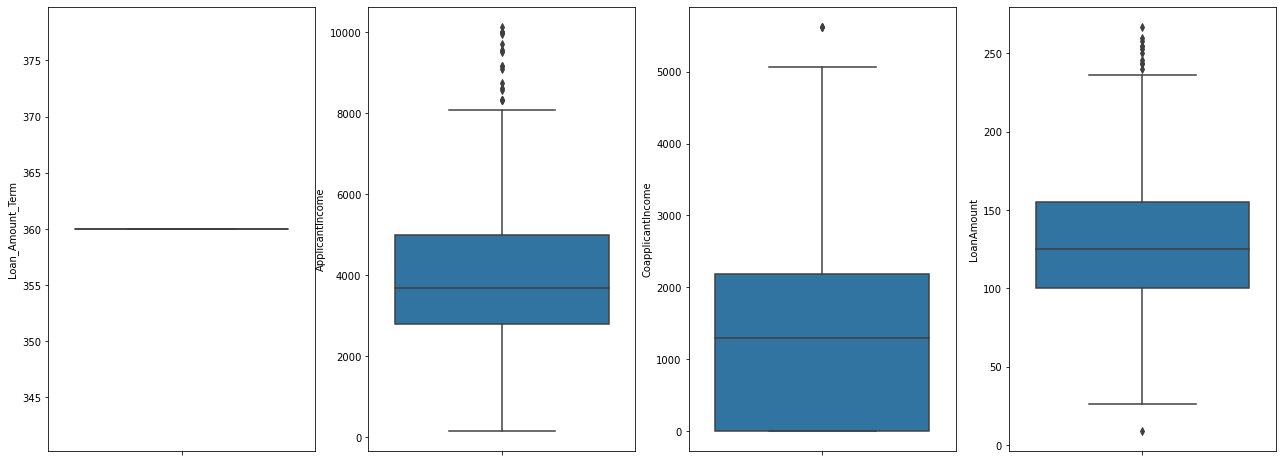

In [59]:
'''
Generate boxplots for all the numerical features vs. the target variable after outliers removed.
'''
num_list=['Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig=plt.figure(figsize=(22, 18))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=column, data=outliers_removed)
    


In [60]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
x = outliers_removed.loc[:, ['Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
y = outliers_removed.loc[:, 'Loan_Status']

fs = SelectKBest(score_func=f_classif, k='all') 
bestFeatures = fs.fit(x, y)   
np.set_printoptions(suppress = True)
outliers_removed = outliers_removed.dropna()
print('f-scores')
print(bestFeatures.scores_)
print('p-scores')
print(bestFeatures.pvalues_)

f-scores
[       nan 1.4009414  6.80041671 0.01122219]
p-scores
[       nan 0.23742311 0.00953032 0.91569879]


C:\Users\jorda\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [61]:
print('dropping numerical values that have p-values above 0.05')
toDrop = ['Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
data.drop(toDrop, inplace=True, axis=1)
print("shape", data.shape)

dropping numerical values that have p-values above 0.05
shape (505, 8)


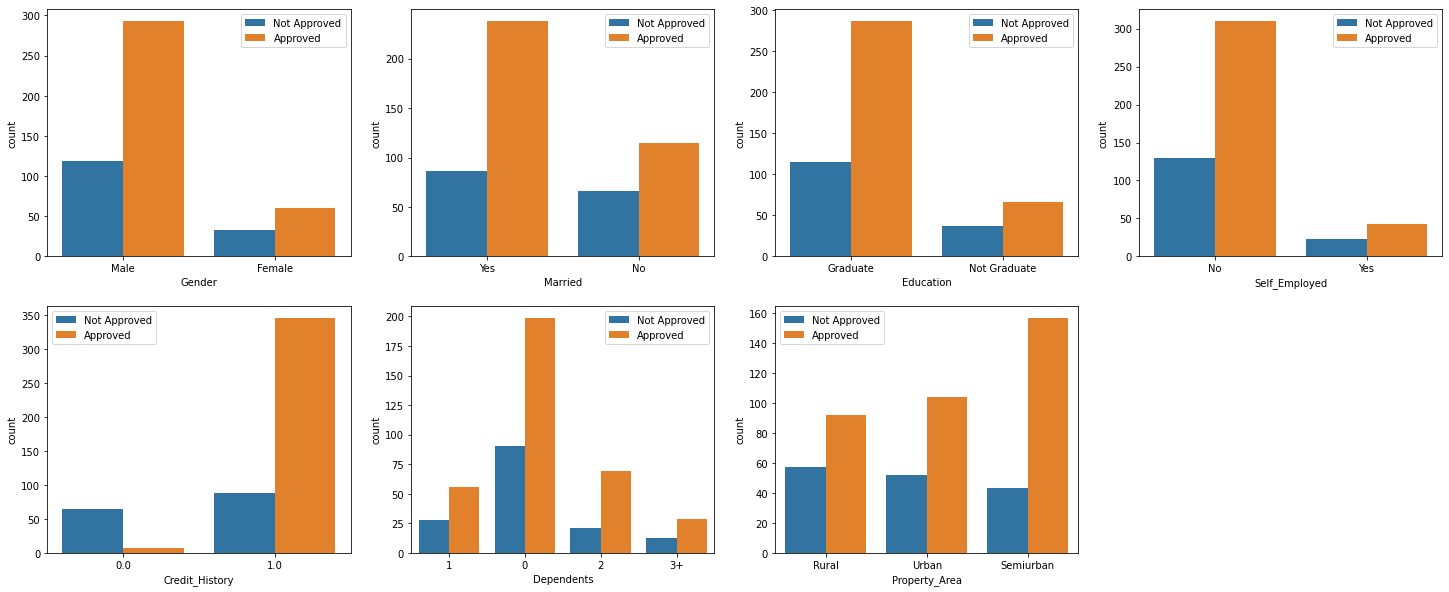

In [62]:
'''
Generate grouped barplots for all the categorical features vs. the target variable. 
'''

cat_list=['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Dependents', 'Property_Area']
fig=plt.figure(figsize=(25,10))
for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(2,4,i+1)
    chart=sns.countplot(x=column, hue='Loan_Status', data=data)
    plt.legend(labels = ['Not Approved', 'Approved'])

In [63]:
'''
Convert categorical data to numeric
for education 0 = not Graduate 1 = graduate
for gender 0=male, 1=female
for married 0=no, 1=yes
for self_emplpoyed 0=no, 1 =yes
for dependents 3 = 3 or more
for property area 0=rural, 1=urban, 2=semiurban
'''
data['Education'].replace(['Not Graduate', 'Graduate'], [0, 1], inplace=True)
data['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
data['Married'].replace(['No', 'Yes'], [0, 1], inplace=True)
data['Self_Employed'].replace(['No', 'Yes'], [0, 1], inplace=True)
data['Dependents'].replace(['3+'], [3], inplace=True)
data['Property_Area'].replace(['Rural', 'Urban', 'Semiurban'], [0, 1, 2], inplace = True)
display(data)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,1.0,0,0
2,0,1,0,1,1,1.0,1,1
3,0,1,0,0,0,1.0,1,1
4,0,0,0,1,0,1.0,1,1
5,0,1,2,1,1,1.0,1,1
...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,1.0,0,1
610,0,1,3,1,0,1.0,0,1
611,0,1,1,1,0,1.0,1,1
612,0,1,2,1,0,1.0,1,1


In [64]:
'''
Use chi-squared test to see the dependance of each categorical feature and the target.
Using the p-value to decide which variables shall be dropped.
'''

x = data.loc[:, ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Dependents', 'Property_Area']]
y = data.loc[:, 'Loan_Status']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)
print(catFeatures.scores_)
print(catFeatures.pvalues_)

[ 1.28172961  1.9470815   0.4253576   0.70761919 19.90212028  0.85708507
  7.36411451]
[0.25757769 0.16290169 0.51427574 0.40023532 0.00000815 0.3545557
 0.00665384]


In [74]:
print("frame where all features with p-value > 0.05 are dropped")
categoryToDrop = ['Gender', 'Married', 'Education', 'Self_Employed', 'Dependents']
data.drop(categoryToDrop, inplace=True, axis=1)
print('shape', data.shape)
print(display(data))

frame where all features with p-value > 0.05 are dropped
shape (505, 3)


,Credit_History,Property_Area,Loan_Status
1,1.0,0,0
2,1.0,1,1
3,1.0,1,1
4,1.0,1,1
5,1.0,1,1
...,...,...,...
609,1.0,0,1
610,1.0,0,1
611,1.0,1,1
612,1.0,1,1


None


In [75]:
'''
Change the categorical variables with more than two unique values to dummy variables. 
Property area has more than 2 unique values.
Feature scaling isnt necessary as we will be using logistic regression.
'''
print(data.shape)
dummyVar = pd.get_dummies(data, columns = ['Property_Area'])
display(dummyVar)

(505, 3)


,Credit_History,Loan_Status,Property_Area_0,Property_Area_1,Property_Area_2
1,1.0,0,1,0,0
2,1.0,1,0,1,0
3,1.0,1,0,1,0
4,1.0,1,0,1,0
5,1.0,1,0,1,0
...,...,...,...,...,...
609,1.0,1,1,0,0
610,1.0,1,1,0,0
611,1.0,1,0,1,0
612,1.0,1,0,1,0


In [76]:
'''
Split the dataset into 80% training dataset and 20% testing dataset. 
'''

x = dummyVar.loc[:, dummyVar.columns!='Loan_Status']
y = dummyVar['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)  
 

In [77]:
'''
Use the over-sampling method to balance the training dataset
'''
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0) 
oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)

print(x_train.shape)
print(oversampled_x.shape)



(404, 4)
(564, 4)


In [78]:
'''
Build the logistic regression model with the training dataset. Evaluate the model with the testing dataset.
Get the accuracy score of the model and the confusion matrix of the result
'''
from sklearn.metrics import ConfusionMatrixDisplay
LogRegression = LogisticRegression(penalty='none', max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())

test_pred = LogRegression.predict(x_test)

print("Accuracy Score")
logReg = accuracy_score(y_test, test_pred)
print('SVC accuracy: {:.2f}%'.format(logReg*100))
print("")

Accuracy Score
SVC accuracy: 86.14%



In [79]:
'''
SVM prediction model.
'''
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(oversampled_x, oversampled_y.values.ravel())

test_pred = SVCclassifier.predict(x_test)

print(classification_report(y_test, test_pred))

from sklearn.metrics import accuracy_score
SVM = accuracy_score(test_pred,y_test)
print('SVM accuracy: {:.2f}%'.format(SVM*100))

              precision    recall  f1-score   support

           0       1.00      0.53      0.70        30
           1       0.84      1.00      0.91        71

    accuracy                           0.86       101
   macro avg       0.92      0.77      0.80       101
weighted avg       0.88      0.86      0.85       101

SVM accuracy: 86.14%


SVM doesnt improve upon the accuracy of my original logistic regression model. This is more than likely due to the reduced feature set compared to the original data set. In the authors data set they retain many of the features I dropped during the data cleaning and processing stages. 

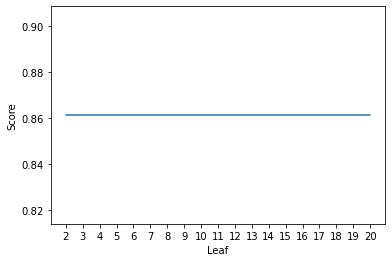

Decision Tree Accuracy: 86.14%


In [80]:
'''
Decision tree model.
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

decisionTreeResults = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(oversampled_x, oversampled_y.values.ravel())
    decisionTreeResults.append(DTclassifier.score(x_test, y_test))
    
plt.plot(range(2,21), decisionTreeResults)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
decisionScore = max(decisionTreeResults)
print("Decision Tree Accuracy: {:.2f}%".format(decisionScore*100))

We see the accuracy score remains at 86.14% when using decision tree. So we arent improving the model by applying different algorithms. The reduction of features performed in my report streamlines the data in such a way to get a consistent accuracy score while the author's report keeps unneccessary features which adds in variablitity. 

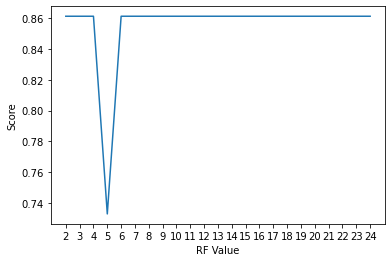

Random Forest Accuracy:  86.14%


In [81]:
randomForestResults = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(oversampled_x, oversampled_y.values.ravel())
    randomForestResults.append(RFclassifier.score(x_test, y_test))
    
plt.plot(range(2,25), randomForestResults)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFScore = max(randomForestResults)
print("Random Forest Accuracy:  {:.2f}%".format(RFScore*100))

We see again that the score hasn't with random forest, given the graph produced by decision tree this isnt a surprise since the variability of the data is limited. In the author's report they were able to achieve 93.33% with the random forest algorithm. This is due to the retaining of features that I choose to cut. While I dont achieve the increase in score the models I have produced are all consistent in their scoring, due to this consistency I believe my choices were correct when processing the data. Decision tree and Random forest benefit from the additional features but given the results of the processing and cleaning steps the features I cut weren't important enough to the prediction target to retain. Due to the fact that the author of the report also used resampled SMOTE data to evaluate their model the scores produced should be questioned.

In [83]:
'''
Saving prediction model
'''
import pickle
pickle.dump(LogRegression, open("model.pkl", "wb"))  



In [84]:
'''
testing saved model
'''
import pickle

Property_Area_0 = 0
Credit_History = 1
Property_Area_1 = 0
Property_Area_2 = 1

CLF_model = pickle.load(open('model.pkl', "rb"))
result = CLF_model.predict([[Credit_History, Property_Area_0, Property_Area_2, Property_Area_1]])
prob = CLF_model.predict_proba([[Credit_History, Property_Area_0, Property_Area_2, Property_Area_1]])
print(result)
print(prob)


[1]
[[0.39751349 0.60248651]]


C:\Users\jorda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
